In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
warnings.filterwarnings("ignore")

# !pip3 install pyramid-arima


In [15]:
pip install pmdarima

     -------------------------------------- 572.0/572.0 kB 1.9 MB/s eta 0:00:00




[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Import Data
df = pd.read_csv('https://github.com/selva86/datasets/raw/master/AirPassengers.csv')

In [16]:
import os 
os.chdir("ARIMA")

FileNotFoundError: [WinError 2] The system cannot find the file specified: 'ARIMA'

In [17]:
df = pd.read_csv('AirPassengers.csv')

In [18]:
df

,date,value
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


<AxesSubplot:xlabel='date'>

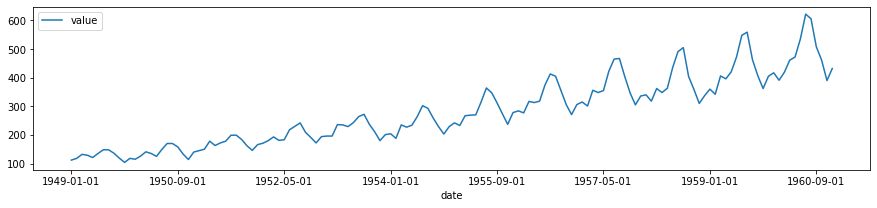

In [19]:
df.plot.line(x = 'date',y = 'value',figsize=(15,3))

# Stationary  -- ADF Test 

* H0 : - The data is  non-stationary
* H1 : - The data is  stationary

* Alpha = 0.05 


In [20]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(df['value'])
dfoutput=pd.Series(dftest[0:4],index=['Test Statistic','p-value','#lags used','number of observations used'])
dfoutput

Test Statistic                   0.815369
p-value                          0.991880
#lags used                      13.000000
number of observations used    130.000000
dtype: float64

* we do not Reject Ho
* The data is  non-stationary

# Differencing  ( d )

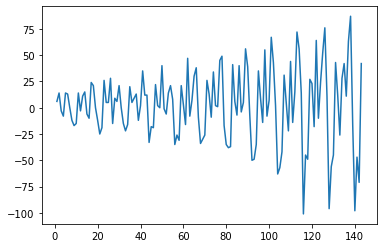

In [21]:
from matplotlib import pyplot

diff = df.value.diff()
pyplot.plot(diff)
pyplot.show()

In [22]:
df['diff_1'] = df['value'].diff()
df['diff_2'] = df['value'].diff(periods=2)
df

,date,value,diff_1,diff_2
0,1949-01-01,112,NaN,NaN
1,1949-02-01,118,6.0,NaN
2,1949-03-01,132,14.0,20.0
3,1949-04-01,129,-3.0,11.0
4,1949-05-01,121,-8.0,-11.0
...,...,...,...,...
139,1960-08-01,606,-16.0,71.0
140,1960-09-01,508,-98.0,-114.0
141,1960-10-01,461,-47.0,-145.0
142,1960-11-01,390,-71.0,-118.0


In [23]:
import numpy as np
np.var(df)

value     14291.973331
diff_1     1131.384029
diff_2     2957.492561
dtype: float64

In [24]:
from statsmodels.tsa.stattools import adfuller
print("Observations of Dickey-fuller test")
dftest = adfuller(df.diff_1.loc[1:,])
dfoutput=pd.Series(dftest[0:4],index=['Test Statistic','p-value','#lags used','number of observations used'])
dfoutput

Observations of Dickey-fuller test


Test Statistic                  -2.829267
p-value                          0.054213
#lags used                      12.000000
number of observations used    130.000000
dtype: float64

* we Reject Ho
* The data is stationary

# ACF & PACF Plot

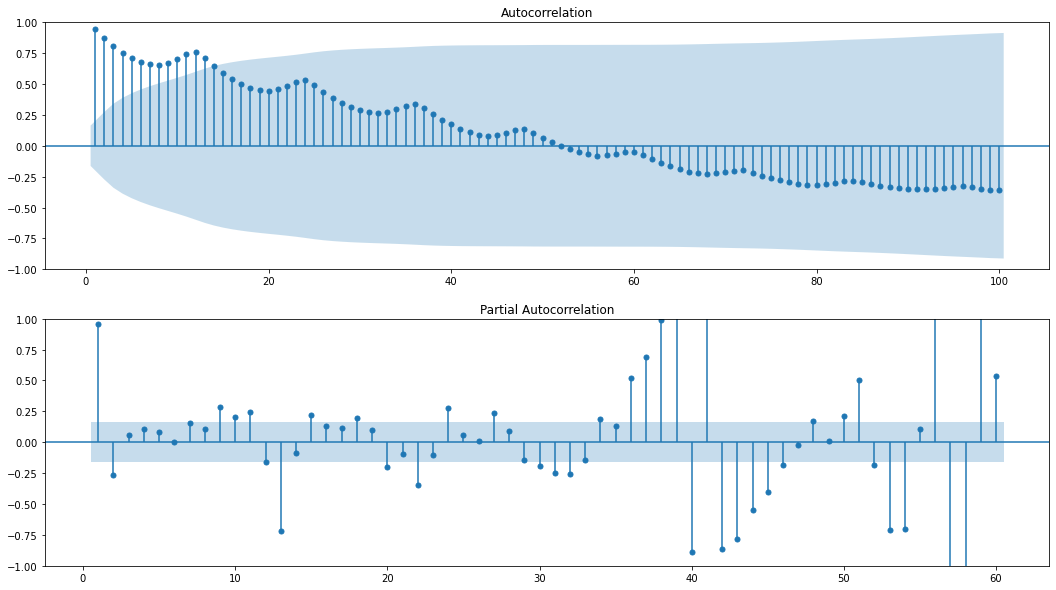

In [25]:
f, ax = plt.subplots(nrows=2, ncols=1, figsize=(18, 10))
plot_acf(df['value'],lags=100, ax=ax[0],zero=False)
plot_pacf(df['value'],lags=60, ax=ax[1],zero=False)
plt.show()

# ARIMA MODEL - Manual 

from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm
model = ARIMA(df.value,
                      start_p=0,max_p=3, # Pacf(p) = 0,1,2,3
                      d=0,max_d=2,       # Difference (d) = 0,1,2
                      start_q=0,max_q=3, # acf (q) = 0,1,2,3
                      m=12,              # frequency of series
                      seasonal=False,    # No Seasonality  then below P,D,Q will not be used 
                      start_P=0,max_P=2,
                      D=0,max_D=1,
                      start_Q=0,max_Q=2,
                      test='adf',       # use adftest to find optimal 'd'
                      trace=True)

# ARIMA MODEL -- Auto ( Grid Search )

In [26]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm
model = pm.auto_arima(df.value,
                      start_p=0,max_p=3, # Pacf(p) = 0,1,2,3
                      d=0,max_d=2,       # Difference (d) = 0,1,2
                      start_q=0,max_q=3, # acf (q) = 0,1,2,3
                      m=12,              # frequency of series
                      seasonal=False,    # No Seasonality  then below P,D,Q will not be used 
                      start_P=0,max_P=0,
                      D=0,max_D=0,
                      start_Q=0,max_Q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2057.847, Time=0.89 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.11 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1412.973, Time=0.08 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=1410.569, Time=0.15 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=1417.450, Time=0.05 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=1411.319, Time=0.23 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=1411.135, Time=0.13 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=1413.093, Time=0.12 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=inf, Time=0.15 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=inf, Time=0.31 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1408.249, Time=0.28 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1409.748, Time=0.10 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1413.639, Time=0.10 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=1408.287, T

# Fitted Value

In [27]:
df['Forecast']=model.predict_in_sample()
df.iloc[:,[0,1,4]]

,date,value,Forecast
0,1949-01-01,112,281.730346
1,1949-02-01,118,117.998851
2,1949-03-01,132,126.803563
3,1949-04-01,129,140.339695
4,1949-05-01,121,131.931477
...,...,...,...
139,1960-08-01,606,617.984568
140,1960-09-01,508,580.077432
141,1960-10-01,461,472.801168
142,1960-11-01,390,458.695873


# Model plot

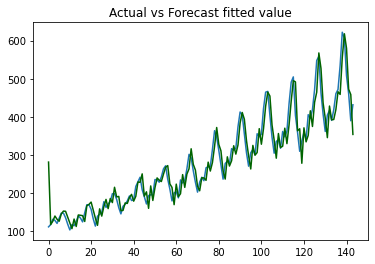

In [28]:
# Plot
plt.plot(df.value)
plt.plot(df.Forecast, color='darkgreen')
plt.title("Actual vs Forecast fitted value")
plt.show()

# Accuracy metrics


In [29]:
def forecast_accuracy(actual,forecast):
    mape = (np.mean(np.abs(actual-forecast)/np.abs(actual)))*100  # MAPE
    return({'mape':mape})

forecast_accuracy(df.value,df.Forecast)

{'mape': 9.555653823209553}

#  Forecast - Future Month


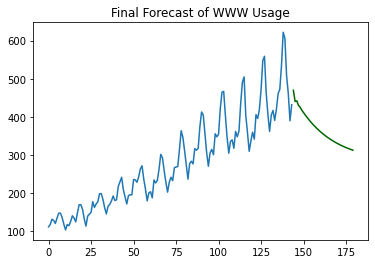

In [30]:
n_periods=36
fc = model.predict(n_periods=n_periods)
index_of_fc = np.arange(len(df.value), len(df.value)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)

# Plot
plt.plot(df.value)
plt.plot(fc_series, color='darkgreen')
plt.title("Final Forecast of WWW Usage")
plt.show()

# SARIMAX -- Auto ( Grid Search )

In [31]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm
smodel = pm.auto_arima(df.value,
                      start_p=0,max_p=3, # Pacf(p) = 0,1,2,3
                      d=0,max_d=2,       # Difference (d) = 0,1,2
                      start_q=0,max_q=3, # acf (q) = 0,1,2,3
                      m=12,              # frequency of series or time
                      seasonal=True,     # Seasonality is True then below P,D,Q will be used 
                      start_P=0,max_P=2,
                      D=0,max_D=1,
                      start_Q=0,max_Q=2,
                      test='adf',       # use adftest to find optimal 'd'
                      trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=1790.368, Time=0.06 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=inf, Time=0.51 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=2057.847, Time=0.01 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=inf, Time=0.39 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=1428.179, Time=0.06 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=1315.686, Time=0.26 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=1162.951, Time=0.37 sec
 ARIMA(1,0,0)(2,0,1)[12] intercept   : AIC=inf, Time=1.08 sec
 ARIMA(1,0,0)(1,0,2)[12] intercept   : AIC=1163.868, Time=1.58 sec
 ARIMA(1,0,0)(0,0,2)[12] intercept   : AIC=inf, Time=0.54 sec
 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=inf, Time=0.60 sec
 ARIMA(1,0,0)(2,0,2)[12] intercept   : AIC=inf, Time=0.98 s

# Fitted Value

In [32]:
df['S_Forecast']=smodel.predict_in_sample()
df.iloc[:,[0,1,5]]

,date,value,S_Forecast
0,1949-01-01,112,0.000000
1,1949-02-01,118,110.919256
2,1949-03-01,132,115.239253
3,1949-04-01,129,125.644878
4,1949-05-01,121,127.212011
...,...,...,...
139,1960-08-01,606,627.696553
140,1960-09-01,508,512.363124
141,1960-10-01,461,454.240606
142,1960-11-01,390,412.201481


# Model plot

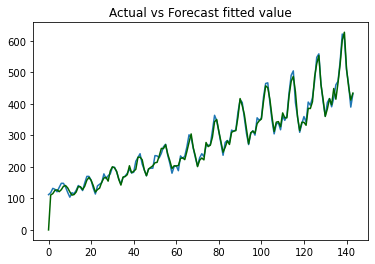

In [33]:
# Plot
plt.plot(df.value)
plt.plot(df.S_Forecast, color='darkgreen')
plt.title("Actual vs Forecast fitted value")
plt.show()

# Accuracy metrics


In [34]:
def forecast_accuracy(actual,forecast):
    mape = (np.mean(np.abs(actual-forecast)/np.abs(actual)))*100  # MAPE
    return({'mape':mape})

forecast_accuracy(df.value,df.S_Forecast)

{'mape': 4.227741666556447}

#  Forecast


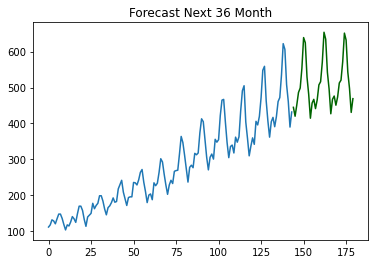

In [35]:
n_periods=36
fc = smodel.predict(n_periods=n_periods)
index_of_fc = np.arange(len(df.value), len(df.value)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)

# Plot
plt.plot(df.value)
plt.plot(fc_series, color='darkgreen')
plt.title("Forecast Next 36 Month")
plt.show()

# Finished